# Лабораторная работа #1
Выполнили:
* Меньшутин Алексей M3436
* Юрий Каменев M3436

## Задание №1
Реализуйте методы одномерного поиска: метод дихотомии, метод золотого сечения, метод Фибоначчи. Сравните их по количеству итераций и количеству вычислений функции в зависимости от разной точности. Для каждого метода обязательно указывайте, как изменяется отрезок при переходе к следующей итерации.

Будем искать минимум функции $F = (1 - x + x^2) / (1 + x - x^2)

### Метод дихотомии
1. Выбираем некоторый отрезок $ [a, b] $
2. Находим середину отрезка $c = \frac{(a + b)}{2}$
3. Вычисляем значение функции $F(c)$ в окрестностях $x$: $F_1 = F(c - \epsilon), F_2 = F(c + \epsilon)$
4. Сравниваем $F_1$ и $F_2$, отбрасываем одну из половин отрезка $[a, b]$.
5. Так как мы ищем минимум, если $F_1 < F_2$, то отбрасываем отрезок $[c, b]$. Иначе отбрасываем отрезок $[a, c]$
6. Повторяем процедуру до тех пор, пока длина отрезка не станет меньше заданной точности $\epsilon$

In [1]:
import tqdm as tqdm
!{sys.executable} -m pip install numpy

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np

In [3]:
def f(x):
    # (1 - x + x^2) / (1 + x - x^2)
    return (1 - x + x ** 2) / (1 + x - x ** 2)

start_point = 0
end_point = 1

In [4]:
def dichotomy(function, left_border, right_border, eps=1e-5):
    a = left_border
    b = right_border

    iterations = 0
    calculations = 0
    segments = [(a, b)]

    while abs(b - a) > eps:
        iterations += 1
        calculations += 2

        c = (a + b) / 2
        if function(c - eps) < function(c + eps):
            b = c
        else:
            a = c

        segments.append((a, b))

    c = (a + b) / 2
    return c, function(c), iterations, calculations, eps, segments

### Метод золотого сечения

Говорят, что точка $c$ осуществляет золотое сечение отрезка $[a, b]$, если $\frac{b - a}{b - c} = \frac{b - c}{c - a} = \phi = \frac{1 + \sqrt{5}}{2}$

Теперь, сам алгоритм:
1. $c_1 = b - \frac{b - a}{\phi}$, $c_2 = a + \frac{b - a}{\phi}$
2. Повторять:
    * если $F(c_1) > F(c_2)$, то $a = c_1, c_1 = c_2, c_2 = b - (c_1 - a)$
    * если $F(c_1) \le F(c_2)$, то $b = c_2, c_2 = c_1, c_1 = a + (b - c_2)$
3. Пока $\frac{b - a}{2} \ge \epsilon$
4. Искомое значение равно $\frac{b + a}{2}$

In [5]:
def golden_ratio(function, left_border, right_border, eps=1e-5):
    phi = (1 + np.sqrt(5)) / 2
    a = left_border
    b = right_border
    iterations = 0
    calculations = 0
    segments = [(a, b)]

    c_1 = b - (b - a) / phi
    c_2 = a + (b - a) / phi

    calc_result = [function(c_1), function(c_2)]
    calculations += 2

    while (b - a) / 2 >= eps:
        iterations += 1
        calculations += 1
        if calc_result[0] > calc_result[1]:
            a = c_1
            c_1 = c_2
            c_2 = b - (c_1 - a)
            calc_result[0] = calc_result[1]
            calc_result[1] = function(c_2)
        else:
            b = c_2
            c_2 = c_1
            c_1 = a + b - c_2
            calc_result[1] = calc_result[0]
            calc_result[0] = function(c_1)
        segments.append((a, b))

    c = (b + a) / 2

    return c, function(c), iterations, calculations, eps, segments

### Метод Фибоначчи

In [6]:
def calculate_fibonacci(n):
    return int(((1 + np.sqrt(5)) ** n - (1 - np.sqrt(5)) ** n) / (2 ** n * np.sqrt(5)))

def find_fibonacci_number(a, b, l):
    left = 0
    right = 1000
    while left < right - 1:
        middle = int((left + right) / 2)
        if calculate_fibonacci(middle) > (b - a) / l:
            right = middle
        else:
            left = middle
    return right

def generate_fibonacci(n):
    sequence = []
    for i in range(n + 1):
        sequence.append(calculate_fibonacci(i))
    return sequence

In [7]:
def fibonacci(function, left_border, right_border, eps=1e-5):
    a = left_border
    b = right_border

    segments = [(a, b)]

    fib_number = find_fibonacci_number(a, b, eps)
    fibonacci_seq = generate_fibonacci(fib_number)

    c_1 = a + fibonacci_seq[fib_number - 2] / fibonacci_seq[fib_number] * (b - a)
    c_2 = a + fibonacci_seq[fib_number - 1] / fibonacci_seq[fib_number] * (b - a)

    k = 1
    calc_res = [function(c_1), function(c_2)]

    iterations = 0
    calculations = 2

    while True:
        iterations += 1
        if calc_res[0] > calc_res[1]:
            a = c_1
            c_1 = c_2
            c_2 = a + fibonacci_seq[fib_number - k - 1] / fibonacci_seq[fib_number - k] * (b - a)
            if k == fib_number - 2:
                break
            else:
                calc_res[0] = calc_res[1]
                calc_res[1] = function(c_2)
                calculations += 1
        else:
            b = c_2
            c_2 = c_1
            c_1 = a + fibonacci_seq[fib_number - k - 2] / fibonacci_seq[fib_number - k] * (b - a)
            if k == fib_number - 2:
                break
            else:
                calc_res[1] = calc_res[0]
                calc_res[0] = function(c_1)
                calculations += 1
        k += 1
        segments.append((a, b))

    c_2 = c_1 + eps
    calculations += 1
    if np.isclose(calc_res[0], function(c_2)):
        a = c_1
    else:
        b = c_2

    segments.append((a, b))
    c = (a + b) / 2

    return c, function(c), iterations, calculations, eps, segments


Теперь сравним полученные результаты для вычислений с разной точностью


In [8]:
from tqdm import tqdm

dich_res = []
gold_res = []
fib_res = []

for eps in tqdm(np.linspace(1e-1, 1e-10, 1000)):
    dich_res.append(dichotomy(f, start_point, end_point, eps))
    gold_res.append(golden_ratio(f, start_point, end_point, eps))
    fib_res.append(fibonacci(f, start_point, end_point, eps))

len(dich_res)

100%|██████████| 1000/1000 [00:00<00:00, 1617.22it/s]


1000

In [9]:
def get_by_index(values, index):
    return list(map(lambda x: x[index], values))

In [10]:
import matplotlib.pyplot as plt


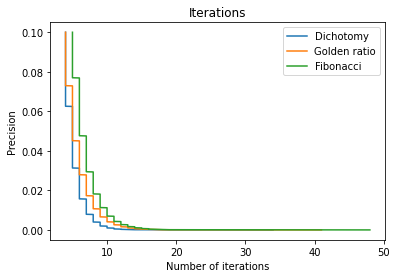

In [11]:
linspace = np.linspace(1e-1, 1e-10, 1000)

plt.plot(get_by_index(dich_res, 2), linspace, label="Dichotomy")
plt.plot(get_by_index(gold_res, 2), linspace, label="Golden ratio")
plt.plot(get_by_index(fib_res, 2), linspace, label="Fibonacci")
plt.title("Iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Precision")
plt.legend()
plt.show()


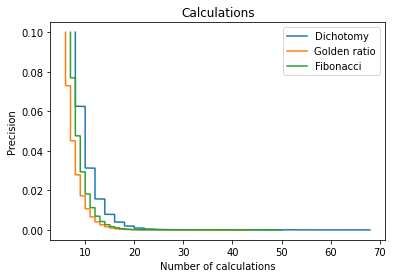

In [12]:
plt.plot(get_by_index(dich_res, 3), linspace, label="Dichotomy")
plt.plot(get_by_index(gold_res, 3), linspace, label="Golden ratio")
plt.plot(get_by_index(fib_res, 3), linspace, label="Fibonacci")
plt.title("Calculations")
plt.xlabel("Number of calculations")
plt.ylabel("Precision")
plt.legend()
plt.show()


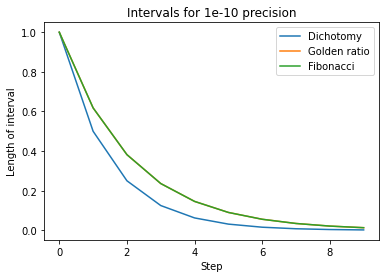

In [13]:
def find_interval_size(pair):
    return np.abs(pair[0] - pair[1])

plt.plot(list(range(len(get_by_index(dich_res, 5)[-1])))[:10], list(map(lambda x: find_interval_size(x), get_by_index(dich_res, 5)[-1]))[:10], label="Dichotomy")
plt.plot(list(range(len(get_by_index(gold_res, 5)[-1])))[:10], list(map(lambda x: find_interval_size(x), get_by_index(gold_res, 5)[-1]))[:10], label="Golden ratio")
plt.plot(list(range(len(get_by_index(fib_res, 5)[-1])))[:10], list(map(lambda x: find_interval_size(x), get_by_index(fib_res, 5)[-1]))[:10], label="Fibonacci")
plt.title("Intervals for 1e-10 precision")
plt.xlabel("Step")
plt.ylabel("Length of interval")
plt.legend()
plt.show()

## Задание №2.
Реализуйте метод градиентного спуска и процедуру линейного поиска. Оцените,
как меняется скорость сходимости, если для поиска величины шага использовать различные методы одномерного поиска.

### Процедура линейного поиска

In [14]:
def linear_search(function, left, delta=1e-2, eps=1e-3, factor=2):
    start_value = function(left)
    cur_delta = delta
    right = left + cur_delta
    while function(right) <= start_value + eps:
        cur_delta *= factor
        right += cur_delta

    return right

### Метод градиентного спуска

In [15]:
import numpy.linalg

def gradient_descent(function, function_grad, cur_arg, step_calculation_method, eps=1e-4):
    gradient_trace = [cur_arg]
    while True:
        cur_grad = function_grad(cur_arg)
        gradient_step = step_calculation_method(function, cur_grad, cur_arg)
        next_arg = cur_arg - gradient_step * cur_grad
        gradient_trace.append(next_arg)
        cur_arg = next_arg

        if numpy.linalg.norm(cur_grad) < eps:
            return gradient_trace

In [16]:
def linear_step_calculation_method(method):

    def result(function, function_grad, arg):
        def linear_optimization_problem(k):
            return function(arg - k * function_grad)

        left_border = 0.
        right_border = linear_search(linear_optimization_problem, left_border)
        answer, _, _, _, _, _ = method(linear_optimization_problem, left_border, right_border)
        return answer

    return result

### Тестовая функция - функция Розенброка

In [17]:
def rosenbrock_function(arg):
    x = arg[0]
    y = arg[1]
    return 100 * ((y - x ** 2) ** 2) + ((1. - x) ** 2)

def rosenbrock_function_grad(arg):
    x = arg[0]
    y = arg[1]
    dx = 2 * (200 * (x ** 3) - 200 * x * y + x - 1)
    dy = 200 * (y - (x ** 2))
    return np.array([dx, dy])


In [18]:
rosenbrock_gradient_start_point = np.array([-10.0, 20.0])

linear_step_calculation_methods = [linear_step_calculation_method(method) for method in [dichotomy, golden_ratio, fibonacci]]
for method in linear_step_calculation_methods:
    trace = gradient_descent(rosenbrock_function, rosenbrock_function_grad, rosenbrock_gradient_start_point, method, 1e-5)
    print('answer =', trace[-1], 'steps =', len(trace))

answer = [0.9999905  0.99998093] steps = 123515
answer = [1.00001081 1.00002158] steps = 98950
answer = [0.99999693 0.99999385] steps = 7248


## Задание #3

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня
функций и траекториями методов.
Попробуйте ответить на следующий вопрос: Как отличается поведение метода
в зависимости от числа обусловленности функции, выбора начальной точки и
стратегии выбора шага?

In [19]:
import matplotlib.pyplot as plt
from tqdm import tqdm

def draw_function(function, function_grad, start, method, show_trace_maker, x_min, x_max, x_step, y_min, y_max, y_step, levels, eps = 1e-4):
    trace = gradient_descent(function, function_grad, start, linear_step_calculation_method(method), eps)
    print('Answer =', trace[-1])
    print(len(trace), 'steps')
    trace_to_show = show_trace_maker(trace)

    x_s = np.arange(x_min, x_max, x_step)
    y_s = np.arange(y_min, y_max, y_step)
    z_s = np.array([[function(np.array([x, y])) for x in x_s] for y in y_s])

    plt.figure()
    cs = plt.contour(x_s, y_s, z_s, levels=levels)
    for i in tqdm(range(len(trace_to_show) - 1)):
        cur_point = trace_to_show[i]
        next_point = trace_to_show[i + 1]
        plt.scatter([cur_point[0]], [cur_point[1]])
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]])
    plt.grid()
    plt.show()

In [20]:
methods = [golden_ratio, fibonacci]

In [21]:
def sum_squares_function(args):
    return np.sum(args ** 2)

def sum_squares_function_grad(args):
    return 2 * args

sum_squares_start_point = np.array([-5.0, 5.0])

Answer = [ 2.76652189e-10 -2.76652189e-10]
3 steps
Answer = [-1.58940775e-10  1.58940775e-10]
3 steps


100%|██████████| 2/2 [00:00<00:00, 401.18it/s]


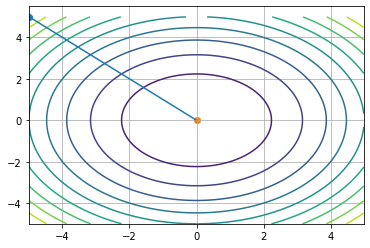

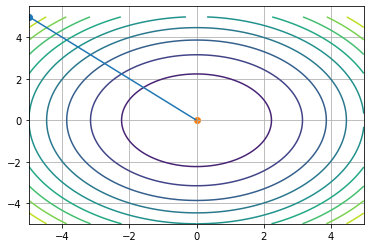

In [22]:
for method in methods:
    draw_function(sum_squares_function,
                  sum_squares_function_grad,
                  start=sum_squares_start_point,
                  method=method,
                  show_trace_maker=lambda trace: trace,
                  x_min=-5,
                  x_max=5,
                  x_step=0.01,
                  y_min=-5,
                  y_max=5,
                  y_step=0.01,
                  levels=10,
    )

In [23]:
def random_function(args):
    x = args[0]
    y = args[1]
    # 6x^2 + 7y^2 - 3 + 7x
    return 6 * x ** 2 + 7 * y ** 2 + 7 * x - 3

def random_function_grad(args):
    x = args[0]
    y = args[1]
    dx = 12 * x + 7
    dy = 7 * y
    return np.array([dx, dy])

random_function_start_point = np.array([-5.0, 5.0])

Answer = [-5.83291037e-01  1.31681231e-05]
225 steps
Answer = [-5.83333331e-01 -1.37959307e-11]
18 steps
Answer = [-5.83333333e-01  4.22113616e-09]
18 steps


100%|██████████| 17/17 [00:00<00:00, 521.53it/s]


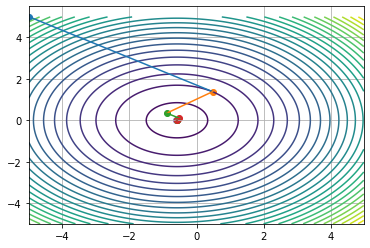

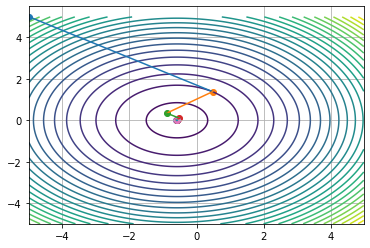

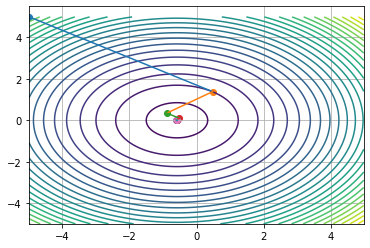

In [24]:
methods = [dichotomy, golden_ratio, fibonacci]

for method in methods:
    draw_function(random_function,
                  random_function_grad,
                  start=sum_squares_start_point,
                  method=method,
                  show_trace_maker=lambda trace: trace,
                  x_min=-5,
                  x_max=5,
                  x_step=0.01,
                  y_min=-5,
                  y_max=5,
                  y_step=0.01,
                  levels=30,
                  eps=1e-7
    )

## Задание №4
Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров:
* числа обусловленности $k \le 1$ оптимизируемой функции
* размерности пространства $n$ оптимизируемых переменных

Для этого для заданных параметров $n$ и $k$ сгенерируйте случайным образом квадратичную задачу размера $n$ с числом обусловленности $k$ и запустите на ней градиентный спуск с некоторой фиксированной требуемой точностью. Замерьте число итераций $T(n, k)$, которое потребовалось сделать методу до сходимости (успешному по критерию остановки)

In [25]:
n_list = [1, 2, 4, 8, 16, 32, 64]
linspace = np.linspace(1, 1000, 200)

In [35]:
def create_matrix(condition_number, n):
    matrix = np.random.randn(n, n)
    matrix = matrix + matrix.T
    u, s, v = np.linalg.svd(matrix)

    # s -- sorted, The condition number is the ratio between
    # the first and last diagonal entries in matrix s
    first_sing_value, last_sing_value = s[0], s[-1]

    s = first_sing_value * (1 - ((condition_number - 1) / condition_number) * (first_sing_value - s) / (first_sing_value - last_sing_value))
    b = (u * s) @ v.T
    res = np.linalg.cond(b)
    assert np.isclose(res, condition_number)
    return b